In [1]:
import time
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Part 1: Thresholding
1.  Threshold the image at three different thresholds 1) 55 2) 90 and 3) 150 using simple binary thresholding and inverse binary thresholding as defined above.
2.  Write your observations about thresholded images at different thresholds. How many and which numbers are segmented at each threshold? (A number is considered as segmented if all digits of that number are considered as foreground in the thresholded image) What else do you observe at each threshold?
3.  Threshold the image using Window binary thresholding using three different range of thresholds. 1) T1=55 and T2=90, 2) T1=90 and T2=150, 3) T1=55 and T2=150. Write your observations. How many and which numbers are segmented at each threshold?
4.  In a practical application, we vary the value of the hyper-parameters (here, the threshold values) for any of the above mentioned thresholding methods, such that we get the desired output. Find a threshold value such that only numbers ”123” and ”549” are segmented (i.e. considered as foreground - white pixel - 255 value). See Figure 1(b). Report your finding for at least three different threshold values, and write how it helped you in narrowing down the desired hyper-parameter value.

<class 'numpy.ndarray'>


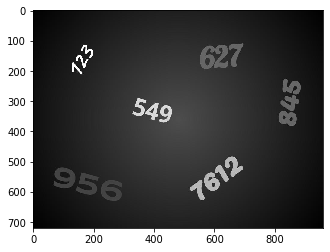

In [2]:
# load and display image
numbers_img = cv2.imread("./images/numbers.jpg")
print(type(numbers_img))
plt.imshow(numbers_img)

In [3]:
# get image dimensions
print(numbers_img.shape)
numbers_height, numbers_width, numbers_depth = numbers_img.shape

# set the thresholds
THRESHES = (55, 90, 150)

(720, 960, 3)


### Simple Binary Threshold

In [4]:
# create placeholders for the thresholded output
numbers_img_thresh1 = np.zeros((numbers_height, numbers_width, numbers_depth), dtype=np.uint8)
numbers_img_thresh2 = np.zeros((numbers_height, numbers_width, numbers_depth), dtype=np.uint8)
numbers_img_thresh3 = np.zeros((numbers_height, numbers_width, numbers_depth), dtype=np.uint8)

# threshold the images
numbers_img_thresh1[numbers_img > THRESHES[0]] = 255
numbers_img_thresh2[numbers_img > THRESHES[1]] = 255
numbers_img_thresh3[numbers_img > THRESHES[2]] = 255

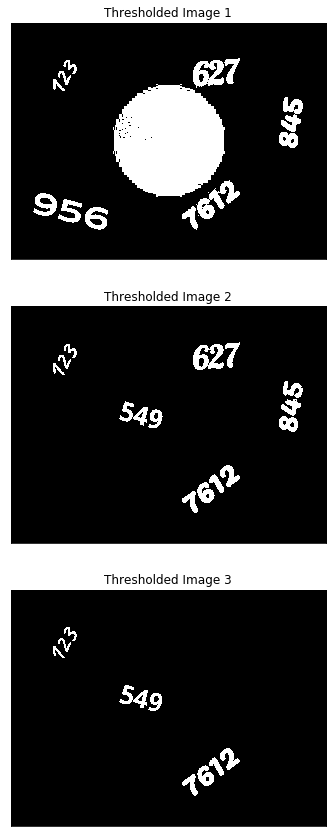

In [5]:
# display images
plt.figure(figsize=(16, 20))
plt.subplot(411), plt.imshow(numbers_img_thresh1)
plt.title("Thresholded Image 1"), plt.xticks([]), plt.yticks([])
plt.subplot(412), plt.imshow(numbers_img_thresh2)
plt.title("Thresholded Image 2"), plt.xticks([]), plt.yticks([])
plt.subplot(413), plt.imshow(numbers_img_thresh3)
plt.title("Thresholded Image 3"), plt.xticks([]), plt.yticks([])
plt.show()

### Inverse Binary Threshold

In [6]:
# create placeholders for the thresholded output
numbers_img_inverse_thresh1 = np.zeros((numbers_height, numbers_width, numbers_depth), dtype=np.uint8)
numbers_img_inverse_thresh2 = np.zeros((numbers_height, numbers_width, numbers_depth), dtype=np.uint8)
numbers_img_inverse_thresh3 = np.zeros((numbers_height, numbers_width, numbers_depth), dtype=np.uint8)

# threshold the images
numbers_img_inverse_thresh1[numbers_img < THRESHES[0]] = 255
numbers_img_inverse_thresh2[numbers_img < THRESHES[1]] = 255
numbers_img_inverse_thresh3[numbers_img < THRESHES[2]] = 255

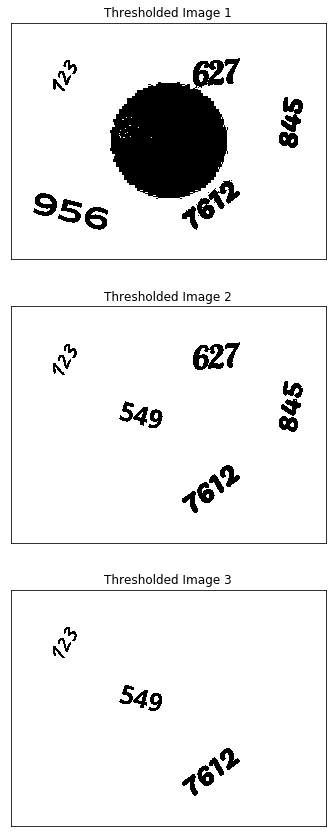

In [7]:
# display images
plt.figure(figsize=(16, 20))
plt.subplot(411), plt.imshow(numbers_img_inverse_thresh1)
plt.title("Thresholded Image 1"), plt.xticks([]), plt.yticks([])
plt.subplot(412), plt.imshow(numbers_img_inverse_thresh2)
plt.title("Thresholded Image 2"), plt.xticks([]), plt.yticks([])
plt.subplot(413), plt.imshow(numbers_img_inverse_thresh3)
plt.title("Thresholded Image 3"), plt.xticks([]), plt.yticks([])
plt.show()

We observe that, the higher the threshold value, the less there is in the foreground.

At the first threshold value, all the numbers are segmented, and so is a circular section of the original image's background gradient. However, only five of the numbers are visible, as that circular section that is segmented coincides with the last number.

At the second threshold value, we observe only five numbers are segmented, however that circular section is no longer segmented, meaning the number that is there (549) is now visible. This came at the cost of losing 956.

At the third threshold value, only three numbers are segmented: 123, 549, and 7612.

### Window Binary Threshold

In [8]:
# set the window thresholds
WINDOW_THRESHES = ((55, 90), (90, 150), (55, 150))

In [9]:
# create placeholders for the thresholded output
numbers_img_window_thresh1 = np.zeros((numbers_height, numbers_width, numbers_depth), dtype=np.uint8)
numbers_img_window_thresh2 = np.zeros((numbers_height, numbers_width, numbers_depth), dtype=np.uint8)
numbers_img_window_thresh3 = np.zeros((numbers_height, numbers_width, numbers_depth), dtype=np.uint8)

# lower threshold the images
numbers_img_window_thresh1[WINDOW_THRESHES[0][0] < numbers_img] = 255
numbers_img_window_thresh2[WINDOW_THRESHES[1][0] < numbers_img] = 255
numbers_img_window_thresh3[WINDOW_THRESHES[2][0] < numbers_img] = 255

# upper threshold the images
numbers_img_window_thresh1[numbers_img > WINDOW_THRESHES[0][1]] = 0
numbers_img_window_thresh1[numbers_img > WINDOW_THRESHES[1][1]] = 0
numbers_img_window_thresh1[numbers_img > WINDOW_THRESHES[2][1]] = 0

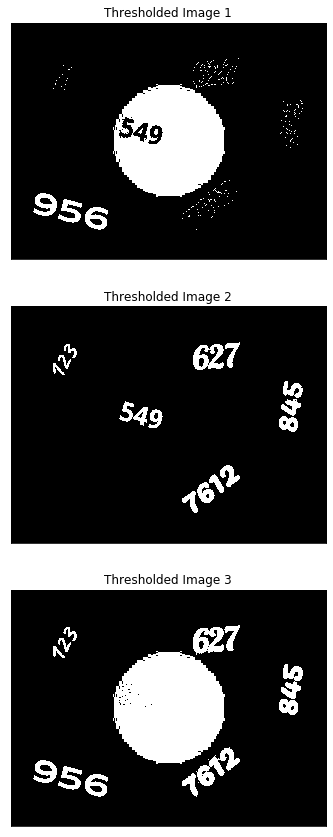

In [10]:
# display images
plt.figure(figsize=(16, 20))
plt.subplot(411), plt.imshow(numbers_img_window_thresh1)
plt.title("Thresholded Image 1"), plt.xticks([]), plt.yticks([])
plt.subplot(412), plt.imshow(numbers_img_window_thresh2)
plt.title("Thresholded Image 2"), plt.xticks([]), plt.yticks([])
plt.subplot(413), plt.imshow(numbers_img_window_thresh3)
plt.title("Thresholded Image 3"), plt.xticks([]), plt.yticks([])
plt.show()

### Varying the Threshold Value

In [11]:
# set the thresholds to test
TEST_THRESHES = (150, 225)

In [12]:
# create placeholders for the thresholded output
numbers_img_test_thresh1 = np.zeros((numbers_height, numbers_width, numbers_depth), dtype=np.uint8)
numbers_img_test_thresh2 = np.zeros((numbers_height, numbers_width, numbers_depth), dtype=np.uint8)

# threshold the images
numbers_img_test_thresh1[numbers_img > TEST_THRESHES[0]] = 255
numbers_img_test_thresh2[numbers_img > TEST_THRESHES[1]] = 255

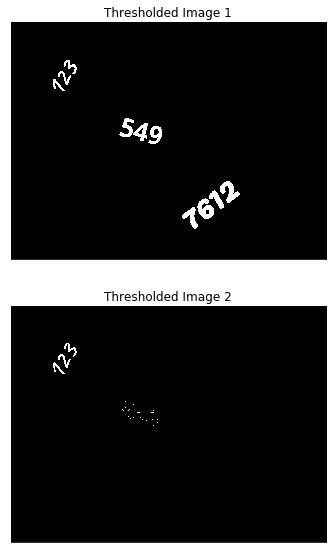

In [13]:
# display images
plt.figure(figsize=(16, 20))
plt.subplot(411), plt.imshow(numbers_img_test_thresh1)
plt.title("Thresholded Image 1"), plt.xticks([]), plt.yticks([])
plt.subplot(412), plt.imshow(numbers_img_test_thresh2)
plt.title("Thresholded Image 2"), plt.xticks([]), plt.yticks([])
plt.show()

As we are trying to make it so only 123 and 549 are visible, we can see above that 150 is too low of a threshold value—it captures 7612 as well—and 225 is too high of a threshold value—it just _barely_ captures some of the pixels for 549. Let's try again with 210.

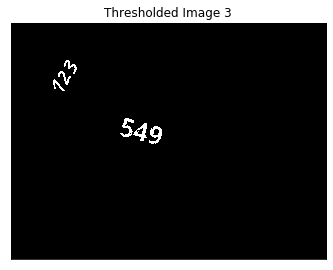

In [14]:
# set the threshold
THRESH = 210

# create placeholder for the thresholded output
numbers_img_test_thresh3 = np.zeros((numbers_height, numbers_width, numbers_depth), dtype=np.uint8)

# threshold the image
numbers_img_test_thresh3[numbers_img > THRESH] = 255

# display image
plt.figure(figsize=(16, 20))
plt.subplot(411), plt.imshow(numbers_img_test_thresh3)
plt.title("Thresholded Image 3"), plt.xticks([]), plt.yticks([])
plt.show()

There, that worked!

## Part 2: Denoising
1.  Filter the noisy image using a 5 × 5 Gaussian filter with variance equal to 2.
2.  Filter the noisy image using a box filter of the same size.
3.  Compare the Peak-Signal-to-Noise-Ratio (PSNR) of both of the denoised images to that of the clean image and state which method gives the superior result. (Use the PSNR function provided by opencv)
4.  Filter the noisy image using the same Gaussian filter as used in the previous question.
5.  Filter the noisy image using a median filter of the same size.
6.  Compare the PSNR of both of the denoised images to that of the clean image and state which method gives a better result.

<class 'numpy.ndarray'>


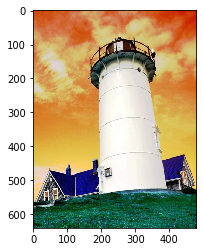

In [15]:
# load and display image
lighthouse_img = cv2.imread("./images/lighthouse.png")
print(type(lighthouse_img))
plt.imshow(lighthouse_img)

In [16]:
# convert to grayscale and get dimensions
lighthouse_img_grey = cv2.cvtColor(lighthouse_img, cv2.COLOR_BGR2GRAY)
lighthouse_height, lighthouse_width = lighthouse_img_grey.shape

(640, 480)


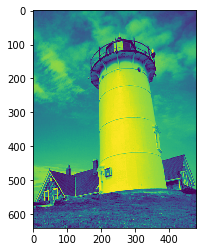

In [17]:
plt.imshow(lighthouse_img_grey)
print(lighthouse_img_grey.shape)

### Gaussian Filter

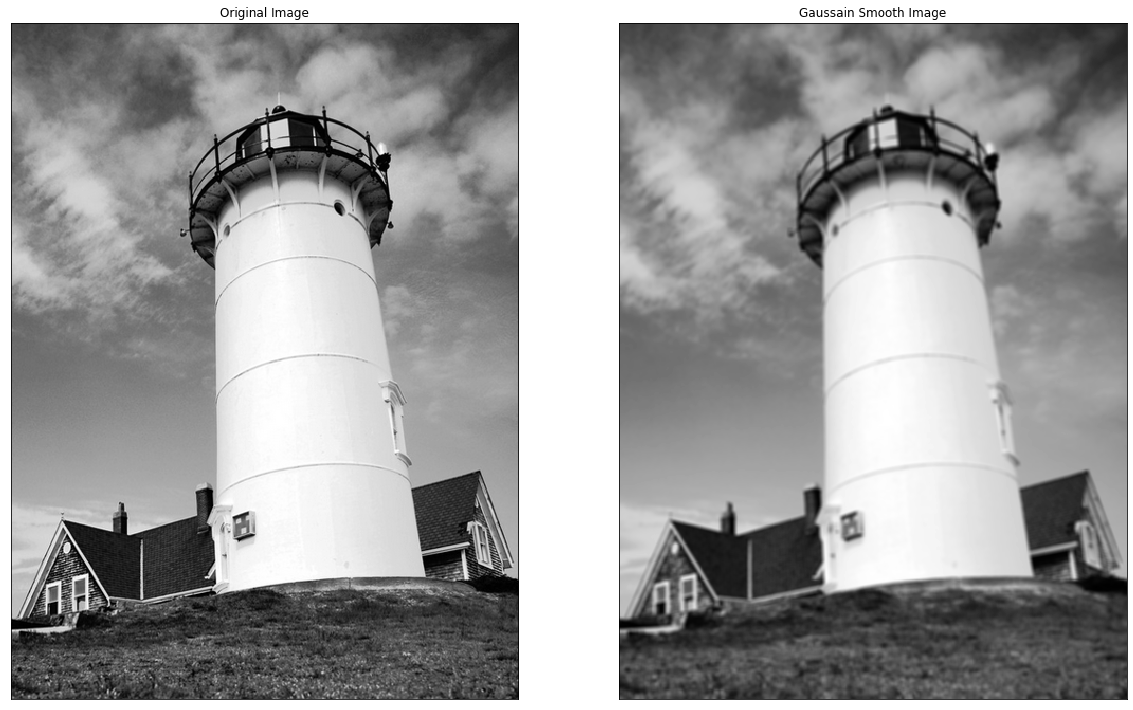

In [31]:
# apply gaussian filter to image
lighthouse_img_gauss = cv2.GaussianBlur(lighthouse_img_grey, (5,5), 2)

# display original and gaussian smoothed image
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(lighthouse_img_grey, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(lighthouse_img_gauss, cmap="gray")
plt.title("Gaussain Smooth Image"), plt.xticks([]), plt.yticks([])
plt.show()

### Box Filter

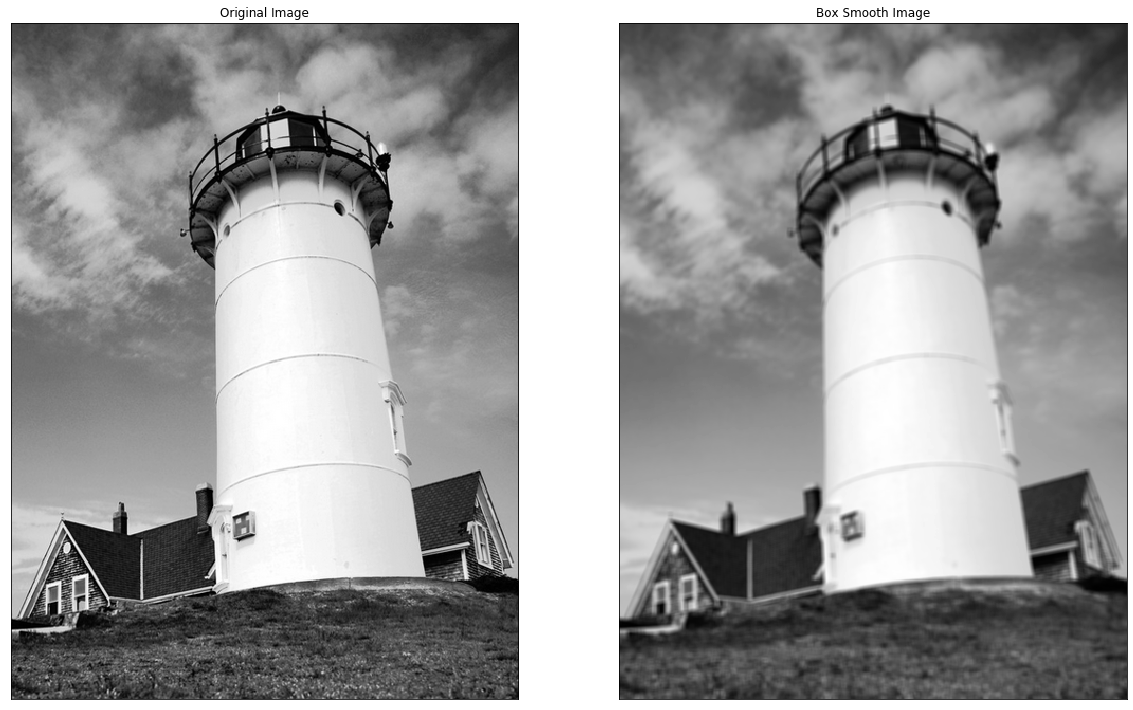

In [32]:
# apply 5x5 box filter
lighthouse_img_blur = cv2.blur(lighthouse_img_grey, (5,5))

# display original and box smoothed image
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(lighthouse_img_grey, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(lighthouse_img_blur, cmap="gray")
plt.title("Box Smooth Image"), plt.xticks([]), plt.yticks([])
plt.show()

### Peak Signal-to-Noise Ratio (PSNR)

In [33]:
print(lighthouse_img_grey.shape)
print(lighthouse_img_gauss.shape)

(640, 480)
(640, 480)


In [40]:
# get PSNR for both gaussian and box filters
gauss_PSNR = cv2.PSNR(lighthouse_img_grey, lighthouse_img_gauss)
blur_PSNR = cv2.PSNR(lighthouse_img_grey, lighthouse_img_blur)

print("Gauss PSNR: {gauss}\nBox PSNR: {box}".format(gauss = gauss_PSNR, box = blur_PSNR))

Gauss PSNR: 26.64222197306785
Box PSNR: 25.79792783224287


Here, we see gaussian filtering has a superior PSNR than box filtering.

### Gaussian Filter Applied to Noisy Image

<class 'numpy.ndarray'>


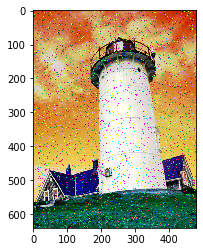

In [35]:
# load and display image
noisy_lighthouse_img = cv2.imread("./images/saltandpepper_lighthouse.png")
print(type(noisy_lighthouse_img))
plt.imshow(noisy_lighthouse_img)

In [36]:
# convert to grayscale and get dimensions
noisy_lighthouse_img_grey = cv2.cvtColor(noisy_lighthouse_img, cv2.COLOR_BGR2GRAY)
noisy_lighthouse_height, noisy_lighthouse_width = noisy_lighthouse_img_grey.shape